# Practice notebook for regression analysis with NHANES

This notebook will give you the opportunity to perform some
regression analyses with the NHANES data that are similar to
the analyses done in the week 2 case study notebook.

You can enter your code into the cells that say "enter your code here",
and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar
to code that appears in the case study notebook.  You will need
to edit code from that notebook in small ways to adapt it to the
prompts below.

To get started, we will use the same module imports and
read the data in the same way as we did in the case study:

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020", 'ALQ110']
da = da[vars].dropna()

## Question 1:

Use linear regression to relate the expected body mass index (BMI) to a person's age.
* Linear function of Age

In [96]:
# enter your code here
smodel_linear_bmi = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR", data=da)
smodel_linear_bmi_result = smodel_linear_bmi.fit()
smodel_linear_bmi_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.280
Date:                Thu, 19 Jan 2023   Prob (F-statistic):              0.131
Time:                        10:56:09   Log-Likelihood:                -5033.1
No. Observations:                1473   AIC:                         1.007e+04
Df Residuals:                    1471   BIC:                         1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.1093      0.596     48.871      0.000      27.941      30.278
RIDAGEYR       0.0161      0.011      1.510      0.131      -0.005       0.037
==============================================================================
Omnibus:                      263.915   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.303
Skew:                           1.083   Prob(JB):                    2.79e-108
Kurtosis:                       4.838   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Fitted model implies that when compaing two people whose age differs by one year, the older person will on average .0091 units higher BMI than the younger person. 

__Q1a.__ According to your fitted model, do older people tend to have higher or lower BMI than younger people?

* Slightly higher BMI with our coef showing a positive value of 0.0091

__Q1b.__ Based your analysis, are you confident that there is a relationship between BMI and age in the population that NHANES represents?

* Default two-sided 95% confidence would not be statistically significant (p-value greater than .05) to suggest a strong relationship. Low confidence 

__Q1c.__ By how much does the average BMI of a 40 year old differ from the average BMI of a 20 year old?

* Similar to the lecture notebook, comparing a 40 year old to a 20 year old person is a 20 year difference in which we just multiply the difference for our Age Coefficient

In [97]:
# Access to coefficient value for Q1c
"Average difference of BMI of a 40 year old compared to a 20 year old is : {} units greater".format(
    round(smodel_linear_bmi_result.params.loc['RIDAGEYR'] * 20, 5))

'Average difference of BMI of a 40 year old compared to a 20 year old is : 0.32251 units greater'

__Q1d.__ What fraction of the variation of BMI in this population is explained by age?

* Reminder on Rsquared (coefficient of determination)
    * The most common interpretation of r-squared is how well the regression model **explains observed data**. For example, an r-squared of 60% reveals that 60% of the variability observed in the target variable is explained by the regression model. 
    * Generally, a higher r-squared indicates more variability is explained by the model.
    
* Back to Ours which is just a r-squared value of 0.001
    * Thus only 1% of the variability observed in our BMI is explained by our regression model

In [98]:
r_squared = da[['BMXBMI', 'RIDAGEYR']].corr().loc['BMXBMI', 'RIDAGEYR'] ** 2
r_squared # When we round up here we'd get the same return of 0.001 as our summary shows

0.0015478952666461545

## Question 2: 

Add gender and ethnicity as additional control variables to your linear model relating BMI to age.  You will need to recode the ethnic groups based
on the values in the codebook entry for [RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1).

In [99]:
# Recode Ethnic Group and Gender (Believe only Ethnic Group recoding required)


da['RIAGENDRx'] = da['RIAGENDR'].replace({1:'Male', 2:'Female'})
da['RIDRETH1x'] = da['RIDRETH1'].replace({1: "Mex_Am", 2: "Oth_Hisp", 3: "Non_Hisp_Wh", 4: "Non_Hisp_Bk", 5: "Other"})

lmodel_2_eth_gnd_age = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da)
result_2_eth_gnd_age_result = lmodel_2_eth_gnd_age.fit()
result_2_eth_gnd_age_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BMXBMI   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     23.80
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           5.55e-27
Time:                        10:56:16   Log-Likelihood:                -4965.8
No. Observations:                1473   AIC:                             9946.
Df Residuals:                    1466   BIC:                             9983.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   31.6846      0.682     46.453      0.000      30.347      33.023
RIAGENDRx[T.Male]           -1.2017      0.407     -2.949      0.003      -2.001      -0.402
RIDRETH1x[T.Non_Hisp_Bk]    -0.7502      0.569     -1.319      0.187      -1.866       0.366
RIDRETH1x[T.Non_Hisp_Wh]    -0.9866      0.562     -1.755      0.080      -2.090       0.116
RIDRETH1x[T.Oth_Hisp]       -1.0388      0.628     -1.654      0.098      -2.271       0.193
RIDRETH1x[T.Other]          -5.8381      0.588     -9.920      0.000      -6.992      -4.684
RIDAGEYR                     0.0058      0.010      0.560      0.576      -0.015       0.026
==============================================================================
Omnibus:                      256.385   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              491.828
Skew:                           1.044   Prob(JB):                    1.59e-107
Kurtosis:                       4.912   Cond. No.                         306.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q2a.__ How did the mean relationship between BMI and age change when you added additional covariates to the model?

* Slight reduction from .0091 to .0065

__Q2b.__ How did the standard error for the regression parameter for age change when you added additional covariates to the model?

* Another slight reduction from .006 to .005

__Q2c.__ How much additional variation in BMI is explained by age, gender, and ethnicity that is not explained by age alone?

* Our initial rsquared value for just age (.001) was increased to (.055) with our included variables. Thus about 5.5% of the variability of our target variable BMI was captured by our model

__Q2d.__ What reference level did the software select for the ethnicity variable?

* Mexican-American is included in the Intercept reference level

__Q2e.__ What is the expected difference between the BMI of a 40 year-old non-Hispanic black man and a 30 year-old non-Hispanic black man?

In [100]:
two_e_dfram = pd.DataFrame({'RIAGENDRx':['Male', 'Male'],
                           'RIDRETH1x': ['Non_Hisp_Bk', 'Non_Hisp_Bk'],
                           'RIDAGEYR': [40, 30]})

two_e_series = result_2_eth_gnd_age_result.predict(two_e_dfram)
print(two_e_series)
expected_difference_40_30 = two_e_series.iloc[0] - two_e_series.iloc[1]
print(expected_difference_40_30)

0    29.965778
1    29.907521
dtype: float64
0.05825616389663324


In [101]:
# I think you can also just take the difference and times our age value here as they are the same sex, and ethnicity
(40-30) * result_2_eth_gnd_age_result.params.loc['RIDAGEYR']

0.05825616389663203

__Q2f.__ What is the expected difference between the BMI of a 50 year-old Mexican American woman and a 50 year-old non-Hispanic black man?

In [102]:
two_f_dframe = pd.DataFrame({'RIAGENDRx':['Female', 'Male'],
                           'RIDRETH1x': ['Mex_Am', 'Non_Hisp_Bk'],
                           'RIDAGEYR': [50, 50]})

two_f_series = result_2_eth_gnd_age_result.predict(two_f_dframe)
print(two_f_series)
expected_2f_difference = abs(two_f_series.iloc[0] - two_f_series.iloc[1])
"Expected (absolute) difference between the two specified individuals would be : {} ".format(
    expected_2f_difference)

0    31.975863
1    30.024034
dtype: float64


'Expected (absolute) difference between the two specified individuals would be : 1.9518292510168642 '

## Question 3: 

Randomly sample 25% of the NHANES data, then fit the same model you used in question 2 to this data set.



In [103]:
sample_25percent = da.sample(frac=0.25)
sample_25percent.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020,ALQ110,RIAGENDRx,RIDRETH1x
1571,130.0,38,1,2,3.0,30.0,1,1.0,Male,Oth_Hisp
2011,112.0,30,2,1,2.0,25.9,2,2.0,Female,Mex_Am
3793,98.0,36,2,4,4.0,24.7,2,1.0,Female,Non_Hisp_Bk
5069,122.0,61,2,2,4.0,18.7,2,1.0,Female,Oth_Hisp
4423,116.0,46,2,4,5.0,40.1,2,1.0,Female,Non_Hisp_Bk


In [104]:
print(len(sample_25percent) / len(da))

sample_25percent['RIAGENDRx'] = sample_25percent['RIAGENDR'].replace({1:'Male', 2:'Female'})
sample_25percent['RIDRETH1x'] = sample_25percent['RIDRETH1'].replace({1: "Mex_Am", 2: "Oth_Hisp", 3: "Non_Hisp_Wh", 4: "Non_Hisp_Bk", 5: "Other"})

lmodel_2_eth_gnd_age_25perc = sm.OLS.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=sample_25percent)
result_2_eth_gnd_age_result_25perc = lmodel_2_eth_gnd_age_25perc.fit()
print(result_2_eth_gnd_age_result_25perc.summary(), '\n')
print("Here's the Original Return of the model ran on the entire dataset\n")
print(result_2_eth_gnd_age_result.summary())

0.24983027834351662
                            OLS Regression Results                            
Dep. Variable:                 BMXBMI   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     6.212
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           3.20e-06
Time:                        10:56:24   Log-Likelihood:                -1259.2
No. Observations:                 368   AIC:                             2532.
Df Residuals:                     361   BIC:                             2560.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

__Q3a.__ How do the estimated regression coefficients and their standard errors compare between these two models?  Do you see any systematic relationship between the two sets of results?

* Noticeable difference in our sampled dataframe in terms of standard error greater variability, coefficients and Intercept values across
* Most noticeably our R-Squared (coefficient of determination) is showing less coverage of the variability of the BMI
* Model with just a 25% percentage of inclusion from our dataset has more wiggle room on standard error and less coverage of our target's variability

## Question 4:

Generate a scatterplot of the residuals against the fitted values for the model you fit in question 2.

<AxesSubplot:title={'center':'Residuals Against Fitted Model'}, xlabel='Fitted Values', ylabel='Residuals'>

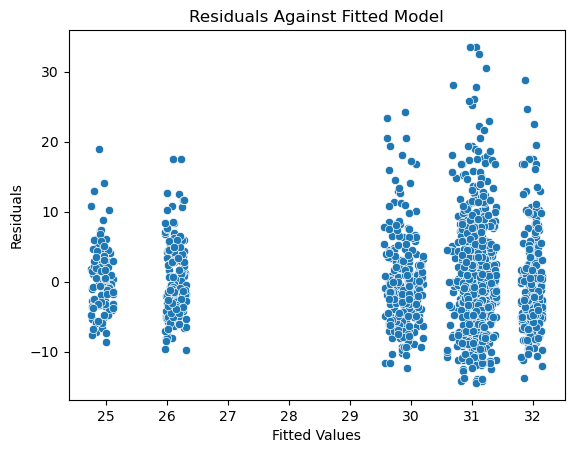

In [105]:
ss_model_2 = sns.scatterplot(x=result_2_eth_gnd_age_result.fittedvalues, y=result_2_eth_gnd_age_result.resid)
ss_model_2.set(xlabel='Fitted Values', ylabel='Residuals', title='Residuals Against Fitted Model')
ss_model_2

__Q4a.__ What mean/variance relationship do you see?

## Question 5: 

Generate a plot showing the fitted mean BMI as a function of age for Mexican American men.  Include a 95% simultaneous confidence band on your graph.

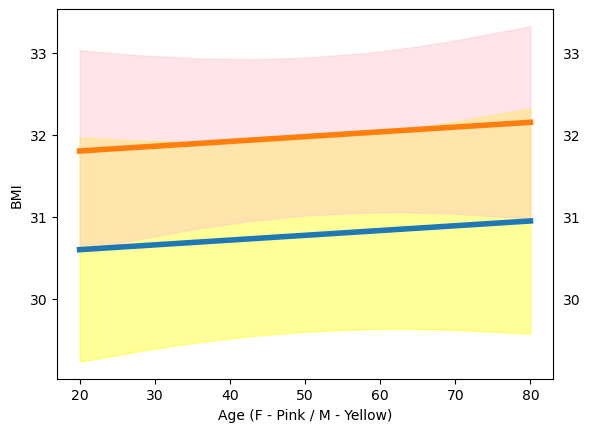

In [107]:
from statsmodels.sandbox.predict_functional import predict_functional
import statistics

# result_2_eth_gnd_age_result this variable holds the fit model for MEAN BMI with the covariates of Age, Ethnicity, Gender

## Pass to summaries argument to offset Warnings 
summaries = {'BPXSY1':np.mean, 'SMQ020':np.mean, 'DMDEDUC2':statistics.mode, 'RIDRETH1':statistics.mode, 'RIAGENDR':statistics.mode, 'ALQ110':statistics.mode}


male_values = {'RIDRETH1x': 'Mex_Am', 'RIAGENDRx': 'Male'}
female_values = {'RIDRETH1x': 'Mex_Am', 'RIAGENDRx': 'Female'}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr_m, cb_m, fv_m = predict_functional(result_2_eth_gnd_age_result, "RIDAGEYR",
                values=male_values, summaries=summaries, ci_method="simultaneous", alpha=.05)

pr_f, cb_f, fv_f = predict_functional(result_2_eth_gnd_age_result, "RIDAGEYR",
                values=female_values, summaries=summaries, ci_method="simultaneous", alpha=.05)

# Create Lineplot for Males and Confidence Bands
ax = sns.lineplot(x=fv_m, y=pr_m, lw=4)
ax.tick_params(labelright=True)
ax.fill_between(fv_m, cb_m[:, 0], cb_m[:, 1], color='yellow', alpha=0.4)

# Create Lineplot for Females and Confidence Bands
sns.lineplot(x=fv_f, y=pr_f, lw=4)
ax.fill_between(fv_f, cb_f[:, 0], cb_f[:, 1], color='pink', alpha=0.4)

ax.set(xlabel='Age (F - Pink / M - Yellow)', ylabel='BMI')

plt.show()


* `pr_m` :  holds our predicted BMI mean value as a function of Age for Mex-Am Ethnicity from our fit model `result_2_eth_gnd_age_result`
* `cb_m` :  holds the respective 95% confidence bands (set by alpha in predict_functional call) for the age values in fv_m
* `fv_m` : Appears to just hold the respective age values in which our two variables defined from the function provides the model prediction and respective bands

* The female values as pr_f or similar would hold the similar values to our male counterparts above 

In [108]:
type(cb_m)
cb_m, fv_m, pr_m

(array([[29.23229088, 31.96659678],
        [29.36525666, 31.92684086],
        [29.47489332, 31.91041406],
        [29.54872338, 31.91814263],
        [29.60005779, 31.94836685],
        [29.63002678, 32.00901856],
        [29.63462405, 32.06526662],
        [29.62560947, 32.1441886 ],
        [29.58673685, 32.28792231],
        [29.57446632, 32.3234953 ]]),
 array([20.        , 28.        , 36.        , 43.        , 50.        ,
        57.77777778, 63.        , 69.        , 78.        , 80.        ]),
 0    30.599444
 1    30.646049
 2    30.692654
 3    30.733433
 4    30.774212
 5    30.819523
 6    30.849945
 7    30.884899
 8    30.937330
 9    30.948981
 dtype: float64)

__Q5a.__ According to your graph, what is the longest interval starting at year 30 following which the mean BMI could be constant?  *Hint:* What is the longest horizontal line starting at age 30 that remains within the confidence band?

* I believe the lower bound CI here is the answer for each band with the longest hoirzontal line. The upper band continues to shows some potential error/higher bands for confident model fitting of BMI values but the lower band on each shown interval does present a fairly flat rate (see the last four indexes (first index value in the CB nd array)) showing a fairly flat horizontal lower band from about age ~58 to 80

__Q5b.__ Add an additional line and confidence band to the same plot, showing the relationship between age and BMI for Mexican American women.  At what ages do these intervals not overlap?

* Trick Question! At each of our age band we see here that confidence bands stretch into each other with the lower female CI band bleeding into our upper male CI band

## Question 6:

Use an added variable plot to assess the linearity of the relationship between BMI and age (when controlling for gender and ethnicity).

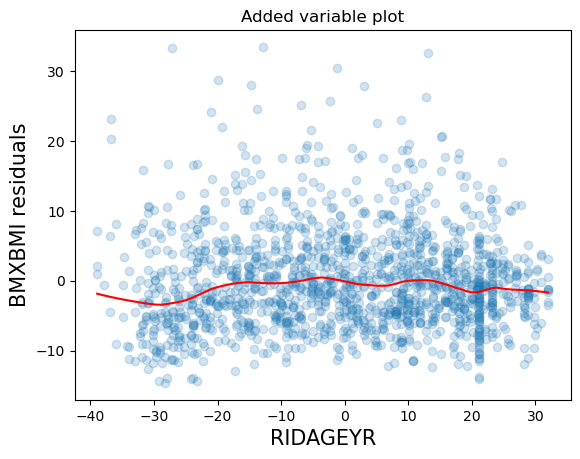

In [109]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
# data is still da for the defined categorical values attributed to our dataframe
model_vp = sm.GLM.from_formula("BMXBMI ~ RIDAGEYR + RIAGENDRx + RIDRETH1x", data=da)
result_vp = model_vp.fit()
result_vp.summary()

fig_vp = result_vp.plot_added_variable("RIDAGEYR")
ax_vp = fig_vp.get_axes()[0]
ax_vp.lines[0].set_alpha(0.2)
_ = add_lowess(ax_vp)

In [85]:
# mean age for refernce
da['RIDAGEYR'].mean(), da['RIDAGEYR'].min()- da['RIDAGEYR'].mean(), da['RIDAGEYR'].describe()

(49.45511564092513,
 -29.45511564092513,
 count    5102.000000
 mean       49.455116
 std        17.682020
 min        20.000000
 25%        34.000000
 50%        49.000000
 75%        64.000000
 max        80.000000
 Name: RIDAGEYR, dtype: float64)

__Q6a.__ What is your interpretation of the added variable plot?

* Our plot_added_variable age is centered (subtracting mean average) from the observed age values
    * younger ages are **negative** from the mean centering and thus the age progresses from our youngest obserbation being negative to our older being positive - see above cell

* We see the highest variance (distance from our residual y-axis) at our earliest ages and latest ages and we see a smoothing of our variable residual variance from our BMI observed value and model prediction within the (age iqr box)
* Assumption would be here that we have some observed values at our younger and older age brackets that the model struggled more with to fit and thus a higher observed residual

## Question 7: 

Generate a binary variable reflecting whether a person has had at least 12 drinks in their lifetime, based on the [ALQ110](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.htm#ALQ110) variable in NHANES.  Calculate the marginal probability, odds, and log odds of this variable for women and for men.  Then calculate the odds ratio for females relative to males.

#### Odds and log odds

Logistic regression provides a model for the *odds* of an event
happening.  Recall that if an event has probability `p`, then the odds
for this event is `p/(1-p)`.  The odds is a mathematical
transformation of the probability onto a different scale.  For
example, if the probability is 1/2, then the odds is 1.

To begin, we look at the odds of alcohol use for women and men separately.

In [117]:
# ALQ110 - Had at least 12 alcohol drinks/lifetime (1 - Yes, 2 - No, 7 - Refused, 9 - Don't Know)

# Set Binary Variable (1 not really needing of replacement but whatever)
da['alchol_bin'] = da['ALQ110'].replace({1: 1, 2: 0, 7: np.nan, 9: np.nan})
alchohol_odds_ctab = pd.crosstab(da['RIAGENDRx'], da['alchol_bin'])
alchohol_odds_ctab

alchol_bin,0.0,1.0
RIAGENDRx,,
Female,569,467
Male,232,200


* Quick reminder here on the lambda apply function below
    * apply will apply each cell value on the row axis with our declaration of 1
    * therefore were taking the found crosstab values for each sex and the new binary value to get the percentage of that subsection of our gender who is either yes or no

In [121]:
alchohol_odds_ctab.apply(lambda x: print(x), axis=1) # axis = 1 is row wise

alchol_bin
0.0    569
1.0    467
Name: Female, dtype: int64
alchol_bin
0.0    232
1.0    200
Name: Male, dtype: int64


RIAGENDRx
Female    None
Male      None
dtype: object

In [123]:
alchohol_odds_ctab.apply(lambda x: print(x), axis=0) # axis = 0 is column wise

RIAGENDRx
Female    569
Male      232
Name: 0.0, dtype: int64
RIAGENDRx
Female    467
Male      200
Name: 1.0, dtype: int64


alchol_bin
0.0    None
1.0    None
dtype: object

In [124]:
print(569/1036) # this is what we're after to get percentages for each subsections percent of falling into our categorical yes/no column from crosstab
alchohol_odds_ctab.apply(lambda x: print(x.sum()), axis=1)

0.5492277992277992
1036
432


RIAGENDRx
Female    None
Male      None
dtype: object

In [125]:
alchohol_odds_ctab = alchohol_odds_ctab.apply(lambda x: x/x.sum(), axis=1)
alchohol_odds_ctab

alchol_bin,0.0,1.0
RIAGENDRx,,
Female,0.549228,0.450772
Male,0.537037,0.462963


In [126]:
## Odds probability again is percentage/(1-p)
## We can simplify this just a bit as our columns value already in sense 
# has the other value of 1-p in the binary's inverse column
alchohol_odds_ctab['odds'] = alchohol_odds_ctab.loc[:, 1] / alchohol_odds_ctab.loc[:, 0]
alchohol_odds_ctab

alchol_bin,0.0,1.0,odds
RIAGENDRx,,,
Female,0.549228,0.450772,0.820738
Male,0.537037,0.462963,0.862069


In [129]:
alchohol_odds_ctab['logodds'] = np.log(alchohol_odds_ctab.odds)
alchohol_odds_ctab

alchol_bin,0.0,1.0,odds,logodds
RIAGENDRx,,,,
Female,0.549228,0.450772,0.820738,-0.197551
Male,0.537037,0.462963,0.862069,-0.148420


* A negative log odds indicates that the second group being compared has greater odds (and greater probability) than the first group.


To interpret the log odds when comparing two groups, it is important to remember the following facts:
* A probability of 1/2, an odds of 1, and a log odds of 0 are all equivalent.
* A positive log odds indicates that the first group being compared has greater odds (and greater probability) than the second group.
* A negative log odds indicates that the second group being compared has greater odds (and greater probability) than the first group.
* The scale of the log odds statistic is symmetric in the sense that a log odds of, say, 2, is equivalent in strength to a log odds of -2 (but with the groups swapped in terms of which has the greater probability).

__Q7a.__ Based on the log odds alone, do more than 50% of women drink alcohol?

* ... only about 45% of the females in our dataset answered yes to our alcohol column

In [128]:
alchohol_odds_ctab.odds.Male / alchohol_odds_ctab.odds.Female

1.0503581185852469

__Q7b.__ Does there appear to be an important difference between the alcohol use rate of women and men?

* Marginal if at all, about 1% more males in our dataset drink than females
    * Men have about a 1.05x greater odds of drinking

## Question 8: 

Use logistic regression to express the log odds that a person drinks (based on the binary drinking variable that you constructed above) in terms of gender.

In [130]:
# Already performed above

__Q8a.__ Is there statistical evidence that the drinking rate differs between women and men?  If so, in what direction is there a difference?

__Q8b.__ Confirm that the log odds ratio between drinking and smoking calculated using the logistic regression model matches the log odds ratio calculated directly in question 6.

In [133]:
alchohol_odds_ctab.odds.Male - alchohol_odds_ctab.odds.Female

0.0413308284346402

## Question 9: 

Use logistic regression to relate drinking to age, gender, and education.

In [ ]:
# enter your code here

__Q9a.__ Which of these predictor variables shows a statistically significant association with drinking?

__Q9b.__ What is the odds of a college educated, 50 year old woman drinking?

__Q9c.__ What is the odds ratio between the drinking status for college graduates and high school graduates (with no college), holding gender and age fixed?

__Q9d.__ Did the regression parameter for gender change to a meaningful degree when age and education were added to the model?

## Question 10:

Construct a CERES plot for the relationship between drinking and age (using the model that controls for gender and educational attainment).

In [ ]:
# enter your code here

__Q10a.__ Does the plot indicate any major non-linearity in the relationship between age and the log odds for drinking?